# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Nearest city lat and Log
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Unique Cities
    if city not in cities:
        cities.append(city)

len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_dict = {}

for x in range(len(cities)):
    try:
        city = cities[x]
        query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
        response = requests.get(query_url).json()
    
        city_name = response['name']
        lat = response['coord']['lat']
        long = response['coord']['lon']
        max_temp = response['main']['temp_max']
        humid = response['main']['humidity']
        clouds = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']

        city_dict[x] ={'City':city_name,
                        'Lat':lat,
                        'Lng':long,
                        'Max Temp':max_temp,
                        'Humidity':humid,
                        'Cloudiness':clouds,
                        'Wind Speed':wind_speed,
                        'Country': country,
                        'Date': date
                       }
        
        print('Processing Record '+str(x)+' of '+str(len(cities))+' | '+city)
    except:
        print('City not found. Skipping...')
        
print('-------------------------------')
print('Data Retrieval Complete')
print('-------------------------------')

Processing Record 0 of 611 | rikitea
Processing Record 1 of 611 | hobart
Processing Record 2 of 611 | pitimbu
Processing Record 3 of 611 | atuona
Processing Record 4 of 611 | arraial do cabo
Processing Record 5 of 611 | tasiilaq
Processing Record 6 of 611 | norman wells
Processing Record 7 of 611 | geraldton
Processing Record 8 of 611 | bluff
City not found. Skipping...
Processing Record 10 of 611 | russellville
Processing Record 11 of 611 | klaksvik
Processing Record 12 of 611 | hofn
Processing Record 13 of 611 | ushuaia
Processing Record 14 of 611 | busselton
City not found. Skipping...
Processing Record 16 of 611 | east london
Processing Record 17 of 611 | shache
City not found. Skipping...
Processing Record 19 of 611 | egvekinot
Processing Record 20 of 611 | barrow
Processing Record 21 of 611 | castro
Processing Record 22 of 611 | cape town
Processing Record 23 of 611 | sept-iles
City not found. Skipping...
Processing Record 25 of 611 | mwaro
Processing Record 26 of 611 | cidreira


Processing Record 213 of 611 | mitu
Processing Record 214 of 611 | andros town
Processing Record 215 of 611 | kysyl-syr
Processing Record 216 of 611 | roberval
City not found. Skipping...
Processing Record 218 of 611 | gourcy
Processing Record 219 of 611 | bairiki
Processing Record 220 of 611 | ambovombe
Processing Record 221 of 611 | tulagi
Processing Record 222 of 611 | souillac
Processing Record 223 of 611 | svetlogorsk
Processing Record 224 of 611 | half moon bay
Processing Record 225 of 611 | ode
Processing Record 226 of 611 | henties bay
Processing Record 227 of 611 | mehamn
Processing Record 228 of 611 | lorengau
Processing Record 229 of 611 | bukoba
Processing Record 230 of 611 | itarema
Processing Record 231 of 611 | marolambo
Processing Record 232 of 611 | tchibanga
City not found. Skipping...
Processing Record 234 of 611 | kibaha
Processing Record 235 of 611 | kollam
Processing Record 236 of 611 | toropets
Processing Record 237 of 611 | djambala
Processing Record 238 of 611 

Processing Record 421 of 611 | amol
Processing Record 422 of 611 | khatanga
Processing Record 423 of 611 | leh
Processing Record 424 of 611 | dibulla
Processing Record 425 of 611 | kangavar
Processing Record 426 of 611 | cabo san lucas
Processing Record 427 of 611 | maarianhamina
Processing Record 428 of 611 | nara
Processing Record 429 of 611 | bell ville
Processing Record 430 of 611 | kargasok
Processing Record 431 of 611 | carlyle
City not found. Skipping...
Processing Record 433 of 611 | calvinia
Processing Record 434 of 611 | lakes entrance
Processing Record 435 of 611 | poyarkovo
Processing Record 436 of 611 | visnes
Processing Record 437 of 611 | rantepao
City not found. Skipping...
Processing Record 439 of 611 | samorin
City not found. Skipping...
City not found. Skipping...
Processing Record 442 of 611 | kandrian
Processing Record 443 of 611 | tuatapere
Processing Record 444 of 611 | zharkent
Processing Record 445 of 611 | krasnosilka
Processing Record 446 of 611 | vanimo
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_df = pd.DataFrame(city_dict)
city_df = city_df.transpose()
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.45,80,78,15.68,PF,1635451734
1,Hobart,-42.8794,147.3294,48.06,93,90,3,AU,1635451701
2,Pitimbu,-7.4706,-34.8086,81.19,66,87,13.91,BR,1635451735
3,Atuona,-9.8,-139.0333,78.1,71,0,16.93,PF,1635451735
4,Arraial do Cabo,-22.9661,-42.0278,73.26,94,75,12.66,BR,1635451456


In [122]:
city_df.to_csv('weatherpy_city_data.csv',index=False,header=True)
print('Done')

Done


In [18]:
city_df.describe()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,563,563.0000,563.0,563.0,563,563,563.00,563,563
unique,562,560.0000,560.0,509.0,87,96,341.00,112,230
top,Mahon,70.6333,-102.2,66.0,79,100,12.66,RU,1635451769
freq,2,2.0000,2.0,4.0,21,136,12.00,67,5


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
# Skipping this step, no cities over 100% humidity

humidity_df = city_df[city_df['Humidity']>100]
print(humidity_df)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [21]:
#  Get the indices of cities that have humidity over 100%.

# Skipping this step, no cities over 100% humidity

In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Skipping this step, no cities over 100% humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

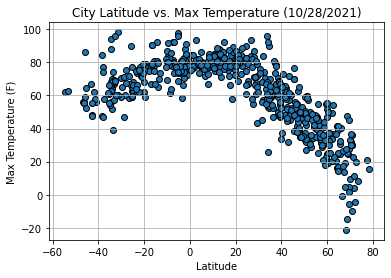

In [125]:
x = city_df['Lat']
y = city_df['Max Temp']

plt.scatter(x,y,edgecolors='k')
plt.title('City Latitude vs. Max Temperature (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)


## Latitude vs. Humidity Plot

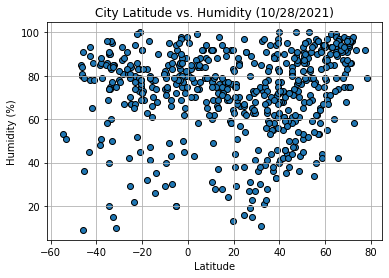

In [25]:
x = city_df['Lat']
y = city_df['Humidity']

plt.scatter(x,y,edgecolors='k')
plt.title('City Latitude vs. Humidity (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

## Latitude vs. Cloudiness Plot

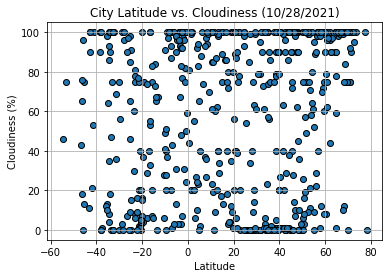

In [124]:
x = city_df['Lat']
y = city_df['Cloudiness']

plt.scatter(x,y,edgecolors='k')
plt.title('City Latitude vs. Cloudiness (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

## Latitude vs. Wind Speed Plot

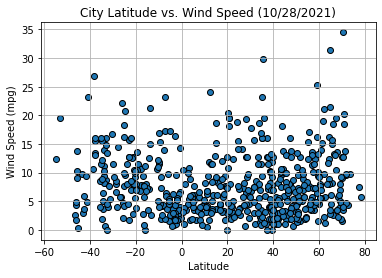

In [123]:
x = city_df['Lat']
y = city_df['Wind Speed']

plt.scatter(x,y,edgecolors='k')
plt.title('City Latitude vs. Wind Speed (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpg)')
plt.grid(True)

## Linear Regression

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [105]:
north_df = city_df.loc[city_df['Lat']>0]
south_df = city_df.loc[city_df['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

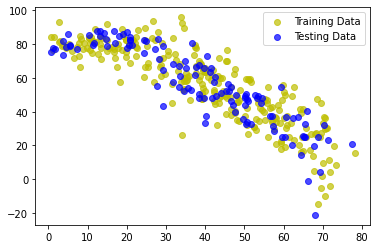

In [106]:
# Linear Regression

x = north_df['Lat'].values
y = north_df['Max Temp'].values

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

plt.scatter(x_train,y_train, label='Training Data', color='y',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='b',alpha=.7)
plt.legend()

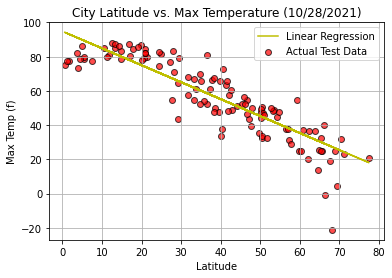

Model accuracy is: 73.91%
R^2 Value is: 0.7792224381955649
The Linear Equation of the Regression is: Y=-0.99X + 94.82


In [107]:
LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

prediction = LR.predict(x_test.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression',color='y')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='r',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Max Temperature (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.grid(True)
plt.show()

scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('Model accuracy is: '+scr)

r2 = r2_score(y_test,prediction)
print('R^2 Value is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

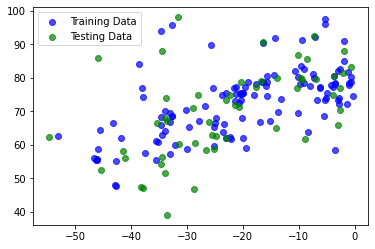

In [108]:
x = south_df['Lat'].values
y = south_df['Max Temp'].values

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

plt.scatter(x_train,y_train, label='Training Data', color='b',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

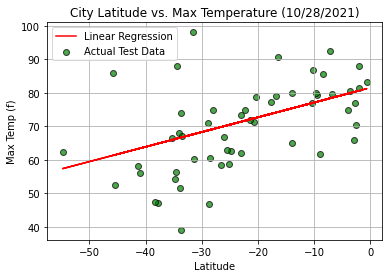

Model accuarcy is: 35.15%
The R^2 Value is: 0.26303304768332814
The Linear Equation of the Regression is: Y=0.44X + 81.51


In [109]:
LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

prediction = LR.predict(x_test.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='g',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Max Temperature (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.grid(True)
plt.show()

scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('Model accuarcy is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

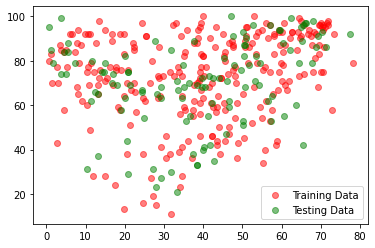

In [110]:
x = north_df['Lat'].values
y = north_df['Humidity'].values

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

plt.scatter(x_train,y_train, label='Training Data', color='r',alpha=.5)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.5)
plt.legend()

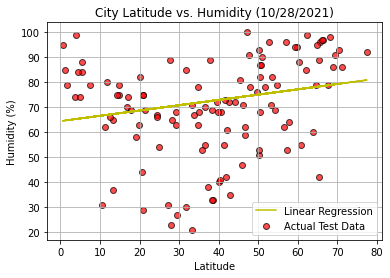

Model accuracy is: 4.53%
R^2 Value is: 0.0353581675087441
The Linear Equation of the Regression is: Y=0.21X + 64.49


In [111]:
LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

prediction = LR.predict(x_test.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression',color='y')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='r',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Humidity (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('Model accuracy is: '+scr)

r2 = r2_score(y_test,prediction)
print('R^2 Value is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

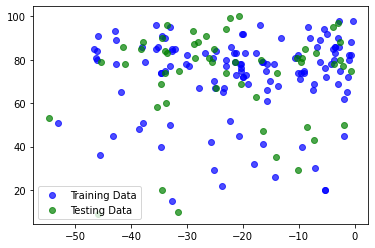

In [112]:
x = south_df['Lat'].values
y = south_df['Humidity'].values

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

plt.scatter(x_train,y_train, label='Training Data', color='b',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

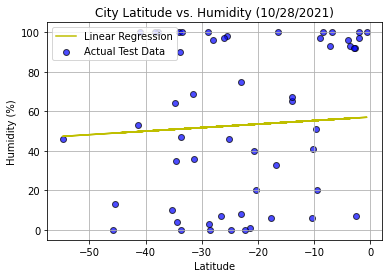

Model accuracy is: 0.41%
R^2 Value is: 0.021699570538571744
The Linear Equation of the Regression is: Y=0.18X + 57.10


In [93]:
LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

prediction = LR.predict(x_test.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression',color='y')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Humidity (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('Model accuracy is: '+scr)

r2 = r2_score(y_test,prediction)
print('R^2 Value is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

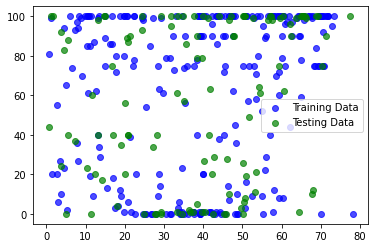

In [113]:
x = north_df['Lat'].values
y = north_df['Cloudiness'].values

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

plt.scatter(x_train,y_train, label='Training Data', color='b',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='g',alpha=.7)
plt.legend()

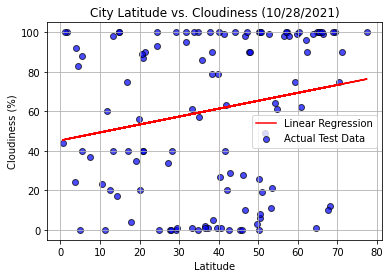

Model accuracy is: 3.83%
The R^2 Value is: 0.02868572177826134
The Linear Equation of the Regression is: Y=0.40X + 45.31


In [114]:
LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

prediction = LR.predict(x_test.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression',color='r')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='b',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Cloudiness (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('Model accuracy is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

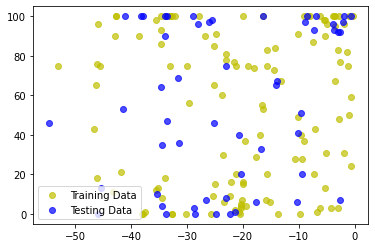

In [115]:
x = south_df['Lat'].values
y = south_df['Cloudiness'].values

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

plt.scatter(x_train,y_train, label='Training Data', color='y',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='b',alpha=.7)
plt.legend()

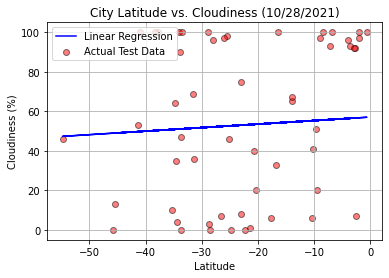

Model is: 0.41%
The R^2 Value is: 0.021699570538571744
The Linear Equation of the Regression is: Y=0.18X + 57.10


In [116]:
LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

prediction = LR.predict(x_test.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression',color='b')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='r',alpha=.5,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Cloudiness (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('Model is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

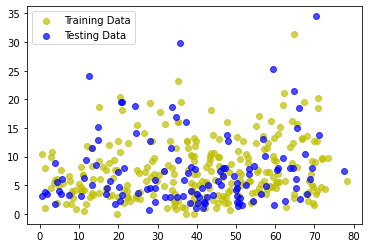

In [117]:
x = north_df['Lat'].values
y = north_df['Wind Speed'].values

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)


plt.scatter(x_train,y_train, label='Training Data', color='y',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='b',alpha=.7)
plt.legend()

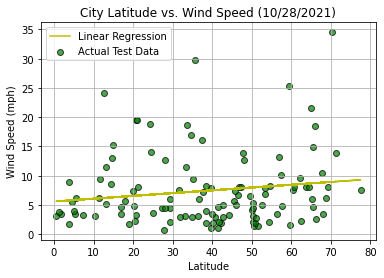

Model accuracy is: 3.55%
The R^2 Value is: 0.01060511108881479
The Linear Equation of the Regression is: Y=0.05X + 5.60


In [118]:
LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

prediction = LR.predict(x_test.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression',color='y')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='g',alpha=.7,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Wind Speed (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

# Evaluate the Model
scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('Model accuracy is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

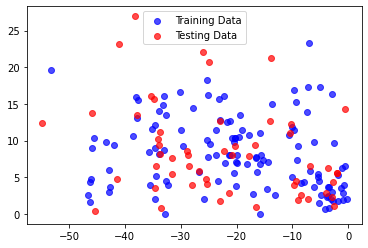

In [119]:
x = south_df['Lat'].values
y = south_df['Wind Speed'].values

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)


plt.scatter(x_train,y_train, label='Training Data', color='b',alpha=.7)
plt.scatter(x_test,y_test, label='Testing Data', color='r',alpha=.7)
plt.legend()

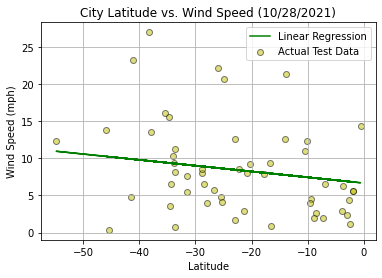

Model accuracy is: 4.65%
The R^2 Value is: 0.07792857913847984
The Linear Equation of the Regression is: Y=-0.08X + 6.66


In [120]:
LR =LinearRegression().fit(x_train.reshape(-1,1),y_train)

prediction = LR.predict(x_test.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression',color='g')
plt.scatter(x_test,y_test,label = 'Actual Test Data',color='y',alpha=.5,edgecolors='k')
plt.legend()
plt.title('City Latitude vs. Wind Speed (10/28/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

scr = LR.score(x_train.reshape(-1,1),y_train)
scr = '{:,.2f}%'.format(scr*100)
print('Model accuracy is: '+scr)

r2 = r2_score(y_test,prediction)
print('The R^2 Value is: '+str(r2))


m = float(LR.coef_)
m=  '{:,.2f}'.format(m)
b= float(LR.intercept_)
b=  '{:,.2f}'.format(b)

print('The Linear Equation of the Regression is: Y='+str(m)+'X + '+str(b))